In [1]:
#### To make some predictions to the stock market's price
#### In order to compare the used methods, the RMSE has been put to test
#### Aissa le 20/08/2020

In [147]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

In [148]:
data = pd.read_csv('sphist.csv')

data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883


In [149]:
data['Date'] = pd.to_datetime(data['Date'])

In [150]:
data = data.sort_values(by=['Date'],ascending=True)

In [151]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
16589,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66
16588,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85
16587,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93
16586,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98
16585,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08


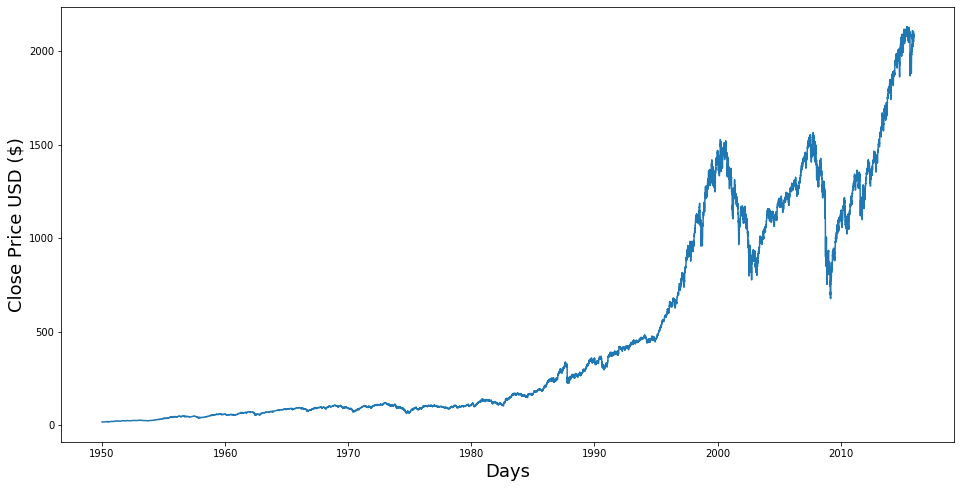

In [152]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(16,8))
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(data['Date'],data['Close'])
plt.show()

In [153]:
(data['Date'] < dt(year=1951,month=1,day=3)) 

16589     True
16588     True
16587     True
16586     True
16585     True
         ...  
4        False
3        False
2        False
1        False
0        False
Name: Date, Length: 16590, dtype: bool

## Quelques indicateurs

In [154]:
data['5 Days open'] = data['Open'].rolling(window=5).mean()
data['5 Days open'] = data['5 Days open'].shift(1)

In [155]:
data['5 Days volume'] = data['Volume'].rolling(window=5).mean()
data['5 Days volume'] = data['5 Days volume'].shift(1)

In [156]:
data['year'] = pd.DatetimeIndex(data['Date']).year

data['average high'] = data.groupby('year')['High'].transform('mean')

data['yearly high ratio'] = data['High'] / data['average high'] 

data['average low'] = data.groupby('year')['Low'].transform('mean')

data['yearly low ratio'] = data['Low'] / data['average low'] 



data.head()

,Date,Open,High,Low,Close,Volume,Adj Close,5 Days open,5 Days volume,year,average high,yearly high ratio,average low,yearly low ratio
16589,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66,NaN,NaN,1950,18.397269,0.905569,18.397269,0.905569
16588,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85,NaN,NaN,1950,18.397269,0.915897,18.397269,0.915897
16587,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93,NaN,NaN,1950,18.397269,0.920245,18.397269,0.920245
16586,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98,NaN,NaN,1950,18.397269,0.922963,18.397269,0.922963
16585,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08,NaN,NaN,1950,18.397269,0.928399,18.397269,0.928399


In [157]:
data['DOW'] = data['Date'].apply(lambda x: x.weekday())

In [158]:
data.head(6)

,Date,Open,High,Low,Close,Volume,Adj Close,5 Days open,5 Days volume,year,average high,yearly high ratio,average low,yearly low ratio,DOW
16589,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000.0,16.660000,NaN,NaN,1950,18.397269,0.905569,18.397269,0.905569,1
16588,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000.0,16.850000,NaN,NaN,1950,18.397269,0.915897,18.397269,0.915897,2
16587,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000.0,16.930000,NaN,NaN,1950,18.397269,0.920245,18.397269,0.920245,3
16586,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000.0,16.980000,NaN,NaN,1950,18.397269,0.922963,18.397269,0.922963,4
16585,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000.0,17.080000,NaN,NaN,1950,18.397269,0.928399,18.397269,0.928399,0
16584,1950-01-10,17.030001,17.030001,17.030001,17.030001,2160000.0,17.030001,16.9,2046000.0,1950,18.397269,0.925681,18.397269,0.925681,1


In [159]:
df_dow = pd.get_dummies(data['DOW'])

In [160]:
df_dow

,0,1,2,3,4
16589,0,1,0,0,0
16588,0,0,1,0,0
16587,0,0,0,1,0
16586,0,0,0,0,1
16585,1,0,0,0,0
...,...,...,...,...,...
4,0,1,0,0,0
3,0,0,1,0,0
2,0,0,0,1,0
1,0,0,0,0,1


In [161]:
data = pd.concat([data,df_dow], axis=1)
data = data.drop(['DOW'],axis=1)

## Préparation de données 

In [162]:
data = data[data['Date']>dt(year=1952,month=1,day=3)]



data = data.dropna(axis=0)

train = data[data['Date']<dt(year=2013,month=1,day=1)]
test = data[data['Date']>dt(year=2013,month=1,day=1)]

In [163]:
train.head()

,Date,Open,High,Low,Close,Volume,Adj Close,5 Days open,5 Days volume,year,average high,yearly high ratio,average low,yearly low ratio,0,1,2,3,4
16089,1952-01-04,23.920000,23.920000,23.920000,23.920000,1480000.0,23.920000,23.758,1332000.0,1952,24.49616,0.976480,24.49616,0.976480,0,0,0,0,1
16088,1952-01-07,23.910000,23.910000,23.910000,23.910000,1540000.0,23.910000,23.812,1336000.0,1952,24.49616,0.976071,24.49616,0.976071,1,0,0,0,0
16087,1952-01-08,23.820000,23.820000,23.820000,23.820000,1390000.0,23.820000,23.856,1350000.0,1952,24.49616,0.972397,24.49616,0.972397,0,1,0,0,0
16086,1952-01-09,23.740000,23.740000,23.740000,23.740000,1370000.0,23.740000,23.866,1340000.0,1952,24.49616,0.969131,24.49616,0.969131,0,0,1,0,0
16085,1952-01-10,23.860001,23.860001,23.860001,23.860001,1520000.0,23.860001,23.854,1400000.0,1952,24.49616,0.974030,24.49616,0.974030,0,0,0,1,0


In [164]:
test.head()

,Date,Open,High,Low,Close,Volume,Adj Close,5 Days open,5 Days volume,year,average high,yearly high ratio,average low,yearly low ratio,0,1,2,3,4
738,2013-01-02,1426.189941,1462.430054,1426.189941,1462.420044,4.202600e+09,1462.420044,1419.434009,2.399036e+09,2013,1649.615712,0.886528,1635.740156,0.871893,0,0,1,0,0
737,2013-01-03,1462.420044,1465.469971,1455.530029,1459.369995,3.829730e+09,1459.369995,1418.641992,2.989764e+09,2013,1649.615712,0.888371,1635.740156,0.889830,0,0,0,1,0
736,2013-01-04,1459.369995,1467.939941,1458.989990,1466.469971,3.424290e+09,1466.469971,1425.793994,3.298704e+09,2013,1649.615712,0.889868,1635.740156,0.891945,0,0,0,0,1
735,2013-01-07,1466.469971,1466.469971,1456.619995,1461.890015,3.304970e+09,1461.890015,1433.702002,3.417526e+09,2013,1649.615712,0.888977,1635.740156,0.890496,1,0,0,0,0
734,2013-01-08,1461.890015,1461.890015,1451.640015,1457.150024,3.601600e+09,1457.150024,1443.376001,3.593184e+09,2013,1649.615712,0.886200,1635.740156,0.887451,0,1,0,0,0


In [165]:
dropped_cols = ['Date','Open','Close','High','Low','Volume','Adj Close','year',
               'average high', 'average low']
target = ['Close']

In [166]:
X_train = train.drop(dropped_cols,axis=1)
y_train = train[target]

X_test = test.drop(dropped_cols,axis=1)
y_test = test[target]

X_train.head()

,5 Days open,5 Days volume,yearly high ratio,yearly low ratio,0,1,2,3,4
16089,23.758,1332000.0,0.976480,0.976480,0,0,0,0,1
16088,23.812,1336000.0,0.976071,0.976071,1,0,0,0,0
16087,23.856,1350000.0,0.972397,0.972397,0,1,0,0,0
16086,23.866,1340000.0,0.969131,0.969131,0,0,1,0,0
16085,23.854,1400000.0,0.974030,0.974030,0,0,0,1,0


In [167]:
X_test.shape

(739, 9)

## Predictions with linear regression 

In [168]:
from sklearn.linear_model import LinearRegression

In [169]:
linear_regression = LinearRegression()

linear_regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [170]:
y_pred = linear_regression.predict(X_test)
y_pred

array([[1411.57898027],
       [1419.54167391],
       [1426.71445899],
       [1434.45383248],
       [1444.19281617],
       [1456.89575992],
       [1461.95902912],
       [1463.37493836],
       [1465.66242873],
       [1465.9482302 ],
       [1468.67359143],
       [1469.78457465],
       [1472.56555374],
       [1474.30959291],
       [1478.73528379],
       [1481.03050939],
       [1486.65129965],
       [1491.73005043],
       [1494.93922045],
       [1498.17030427],
       [1502.04684898],
       [1500.2795147 ],
       [1500.45607426],
       [1502.3606868 ],
       [1505.13923495],
       [1503.71358304],
       [1507.25921864],
       [1511.03823283],
       [1511.57113714],
       [1515.07159638],
       [1516.62904813],
       [1517.63128329],
       [1520.06852003],
       [1517.59513182],
       [1521.95386282],
       [1520.63111763],
       [1509.06158108],
       [1515.91138273],
       [1505.84150221],
       [1503.84475609],
       [1501.78672202],
       [1506.222

In [171]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae= mean_absolute_error(y_pred,y_test)

rms = np.sqrt(mean_squared_error(y_test, y_pred))

In [172]:

rms

24.96595523729249

### Results vizualisation 

/Users/aisaidi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


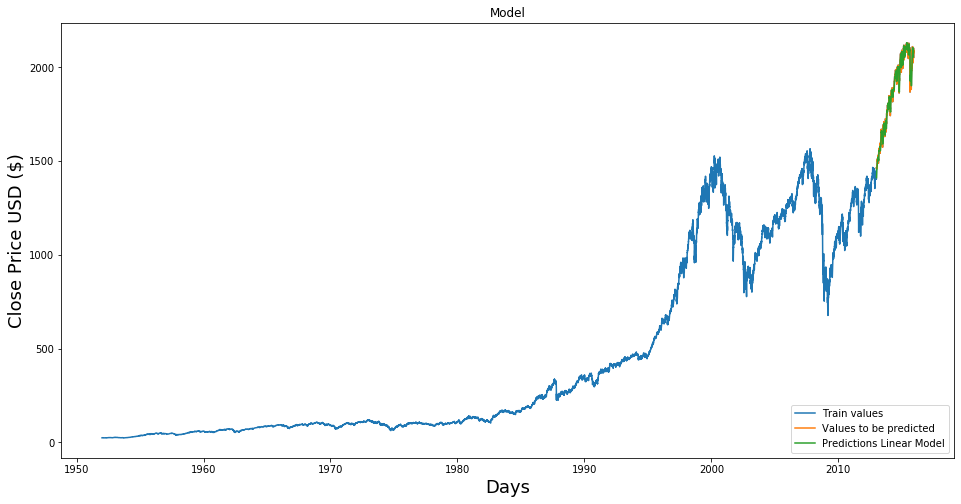

In [173]:
predictions = y_pred
test['Predictions'] = y_pred
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
#plt.plot(data['Date'],data['Close'])
plt.plot(data['Date'],data['Close'])
plt.plot(test['Date'],test[['Close','Predictions']])
plt.legend(['Train values','Values to be predicted', 'Predictions Linear Model' ], loc='lower right')
plt.show()

#### ZOOM

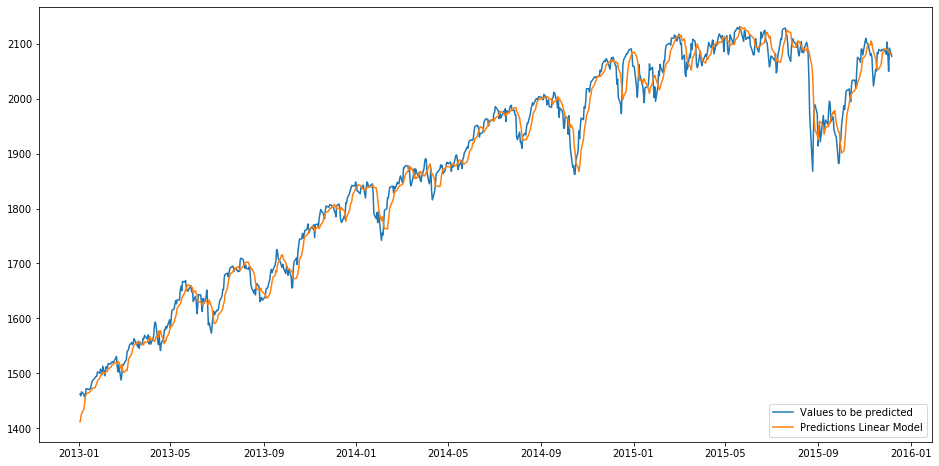

In [174]:
plt.figure(figsize=(16,8))
plt.plot(test['Date'],test[['Close','Predictions']])
plt.legend(['Values to be predicted', 'Predictions Linear Model' ], loc='lower right')

## Predictions with Decision Tree Regressor

In [185]:

tree_reg = DecisionTreeRegressor()

tree_reg.fit(X_train,y_train)

y_1 = tree_reg.predict(X_test)



rms_bis = np.sqrt(mean_squared_error(y_test, y_1))
rms_bis

374.06913057154975

## XGBoost

In [291]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor




In [292]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.8, learning_rate = 1.5,
                max_depth = 15, alpha = 100, n_estimators = 1)


xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=100, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1.5, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=100,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [293]:
y_hat = xg_reg.predict(X_test)

In [297]:
rmse = np.sqrt(mean_squared_error(y_test, y_hat))

In [298]:
rmse

364.965642538518

## Random Forest Regressor

In [300]:
from sklearn.ensemble import RandomForestRegressor


regr = RandomForestRegressor()
regr.fit(train[['5 Days open']],y_train.values.ravel())
y_prev = regr.predict(test[['5 Days open']])

In [301]:
rmse_ = np.sqrt(mean_squared_error(y_test, y_prev))

In [302]:
rmse_

384.80776992262815

## Conclusion 

Trees based methods (Random Forest Regressor and XGBoost) look to overtfitt parameters in this case study